In [21]:
# Implementing the false position method for fiding the root of a non-linear function
def falsePosition(f, a, b, epsilon, maxIter=50):
    
    # Initializing variables
    f_a  = f(a)
    f_b = f(b)
    
    # Bolazano's Theorem test: product test
    # Does the function change signs within the given interval
    if f_a * f_b > 0:
    
        print('Error: There is not root in the given interval for the given function')
    
        return(True, None)

    intervX = abs(b - a)
    
    # Setting initial interval size
    if intervX <= epsilon:
        return(False, a)
    
    # Checking if 'a' is a root
    if abs(f_a) <= epsilon:
        return(False, a)
    
    # Checking if 'b' is a root
    if abs(f_b) <= epsilon:
        return(False, b)
    
    # Output table header
    print('k\t  a\t\t  f(a)\t\t  b\t\t  f(b)\t\t  x\t\t  f(x)\t\tintervX')
    
    for k in range(1, maxIter+1):
        
        # Calculating x and f_x
        x = (a * f_b - b * f_a)/(f_b - f_a)
        f_x = f(x)
        
        # Displaying values at each iteration
        print('%d\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f' % (k, a, f_a, b, f_b, x, f_x, intervX))    
    
        # Stopping criteria
        if abs(f_x) <= epsilon:
            return(False, x)
        
        # Checking the interval where the root is located at
        if f_a * f_x > 0:
            a = x
            f_a = f_x
        
        else:
            b = x
            f_b = f_x
        
        # Updates intervX and checkes the maxIter stopping criteria
        intervX = abs(b - a)
        
        if intervX <= epsilon:
            return(False, x)     
        
    # Returns an error message and last found root
    print('Error: maximum allowed iterations reached')
    
    return(True, x)


# Creating a general function to be used
def f(x):
    
    x = x**3 - 9*x + 3
    
    return x


# Setting parameters for testing purposes
a = 0
b = 1
epsilon = 0.001
maxIter = 20

errorFound, root = falsePosition(f=f, a=a, b=b, epsilon=epsilon, maxIter=maxIter)

print('\nRoot Found:')
print(round(root, 4))



k	  a		  f(a)		  b		  f(b)		  x		  f(x)		intervX
1	0.000000	3.000000	1.000000	-5.000000	0.375000	-0.322266	1.000000
2	0.000000	3.000000	0.375000	-0.322266	0.338624	-0.008790	0.375000
3	0.000000	3.000000	0.338624	-0.008790	0.337635	-0.000226	0.338624

Root Found:
0.3376


In [27]:
def falsePosition(f, a, b, epsilon, maxIter=50):
    # Initialization
    f_a = f(a)
    f_b = f(b)
    intervX = abs(b - a)
    
    if f_a * f_b > 0:
        raise ValueError("Error: There is no root in the given interval for the given function")
    
    if intervX <= epsilon:
        return False, a
    
    # Output table header
    print('k\t  a\t\t  f(a)\t\t  b\t\t  f(b)\t\t  x\t\t  f(x)\t\tintervX')
    
    intervX_list = []  # List to store interval sizes
    f_x_list = []  # List to store corresponding function values
    
    for k in range(1, maxIter + 1):
        # Calculating x and f_x
        x = (a * f_b - b * f_a) / (f_b - f_a)
        f_x = f(x)
        
        # Displaying values at each iteration
        print('%d\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f\t%.6f' % (k, a, f_a, b, f_b, x, f_x, intervX))
        
        intervX_list.append(intervX)
        f_x_list.append(f_x)
        
        # Stopping criteria
        if abs(f_x) <= epsilon:
            return False, x, intervX_list, f_x_list
        
        # Updating interval
        if f_a * f_x > 0:
            a = x
            f_a = f_x
        else:
            b = x
            f_b = f_x
        
        # Updating intervX
        intervX = abs(b - a)
        if intervX <= epsilon:
            return False, x, intervX_list, f_x_list
    
    print('Error: Maximum allowed iterations reached')
    return True, x, intervX_list, f_x_list

# Storing results in varibles
errorFound, root, intervX_list, f_x_list = falsePosition(f=f, a=a, b=b, epsilon=epsilon, maxIter=maxIter)


k	  a		  f(a)		  b		  f(b)		  x		  f(x)		intervX
1	0.000000	3.000000	1.000000	-5.000000	0.375000	-0.322266	1.000000
2	0.000000	3.000000	0.375000	-0.322266	0.338624	-0.008790	0.375000
3	0.000000	3.000000	0.338624	-0.008790	0.337635	-0.000226	0.338624


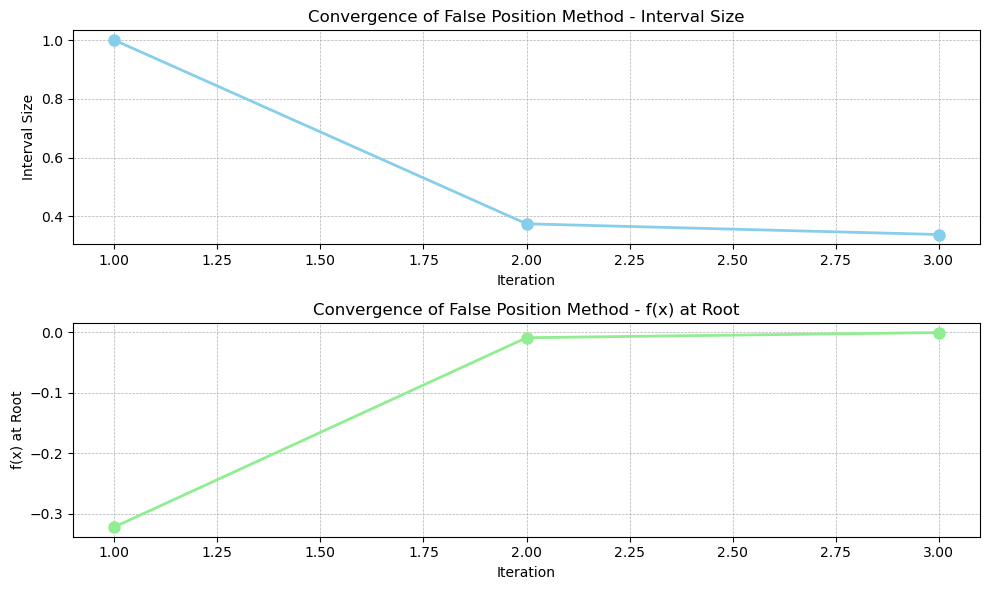

In [28]:
# Importing support library
import matplotlib.pyplot as plt

# Creting plotting function
def plot_convergence(intervX_list, f_x_list):
    # Plotting intervX and f_x in separate plots
    plt.figure(figsize=(10, 6))

    # Plotting intervX
    plt.subplot(2, 1, 1)
    plt.plot(range(1, len(intervX_list) + 1), intervX_list, marker='o', color='skyblue', linewidth=2, markersize=8)
    plt.xlabel('Iteration')
    plt.ylabel('Interval Size')
    plt.title('Convergence of False Position Method - Interval Size')
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Plotting f_x
    plt.subplot(2, 1, 2)
    plt.plot(range(1, len(f_x_list) + 1), f_x_list, marker='o', color='lightgreen', linewidth=2, markersize=8)
    plt.xlabel('Iteration')
    plt.ylabel('f(x) at Root')
    plt.title('Convergence of False Position Method - f(x) at Root')
    plt.grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage
plot_convergence(intervX_list, f_x_list)


### End